# Logistic regression 
Perform logistic regression using gradient descent.

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

import tensorflow as tf
print(tf.__version__)  # Ensure that we're using "2.0.0-rc1"

2.0.0-rc1


In [2]:
# Import dependencies
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

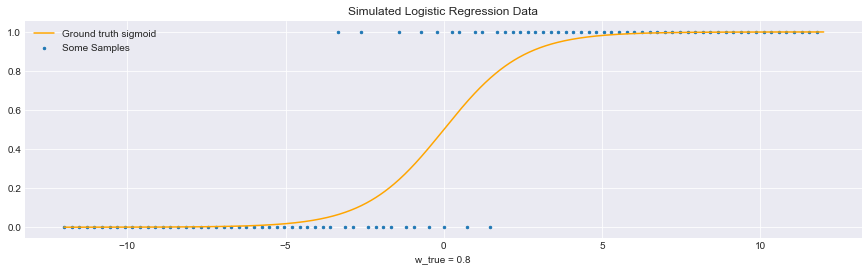

In [3]:
# Generate samples
n_samples = 1000 # Number of samples (datapoints)

w = 0.8  # Ground truth weight
sig = 4  # Ground truth variance of normally distributed errors, epsilon_k ~ N(0, sigma)

# Define Sigmoid
def sigmoid(x, w):
    return 1 / (1 + np.exp(-w * x))

train_x = np.linspace(-12, 12, n_samples)
# Question 2: Apply logistic regression model
train_y = np.random.binomial(1, sigmoid(train_x, w))

# Plot the data points
plt.figure(figsize=(15,4))
plt.plot(train_x, sigmoid(train_x, w), color='orange', label='Ground truth sigmoid')
plt.scatter(train_x[0:-1:10], train_y[0:-1:10], s=6, marker='o', label='Some Samples') # Only show 100 samples for better looking
plt.legend()
plt.xlabel('w_true = %s' % (w))
plt.title('Simulated Logistic Regression Data')
plt.show()

In [8]:
# Try playing around with different learning rates and iterations to see what will happen.
learning_r = 6e-2
iterations = 500

# Try different initializations of w.
w_est = tf.Variable(1., name="weight", dtype=tf.float64) 

# Some reshape of data
train_x = train_x.reshape(n_samples, 1).astype("float64")
train_y = train_y.reshape(n_samples, 1).astype("float64")

@tf.function
def loss_function(w, x, y):
    p = tf.divide(1, 1 + tf.exp(-w_est * x))    
    # Compute cross entropy (maximizing MLE leads to minimizing cross entropy)
    loss = -1 * tf.reduce_sum(y * tf.math.log(p) + (1 - y) * tf.math.log(1 - p)) / n_samples
    return loss

optimizer = tf.keras.optimizers.SGD(learning_r)

# Book-keeping
loss_history = np.zeros(shape=(iterations,))
weight_history = np.zeros(shape=(iterations,))

for i in range(iterations):
    # Apply minimize, passing in the loss function and variables
    optimizer.minimize(lambda: loss_function(w_est, train_x, train_y), var_list=[w_est])
    loss_history[i] = loss_function(w_est, train_x, train_y).numpy()
    weight_history[i] = w_est.numpy()
print('Estimated weight: %s' % (w_est.numpy()))
print('True weight: %s' % (w))

Estimated weight: 0.7458282832218912
True weight: 0.7458282832218912


**Note: The [`@tf.function`](https://www.tensorflow.org/beta/tutorials/eager/tf_function) decorator is used to convert Python code into a computational graph automatically, using AutoGraph. However, there may be a warning when you run it that looks like:

```
WARNING: Entity <function loss_function at 0x137e7d840> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4
```
Do not worry about this; it just means that there was a problem with AutoGraph, but it should not affect your results.

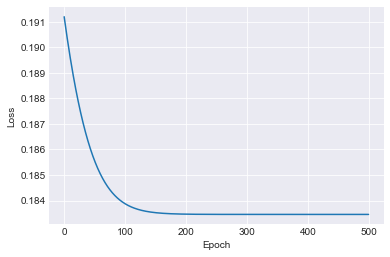

In [9]:
plt.figure()
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

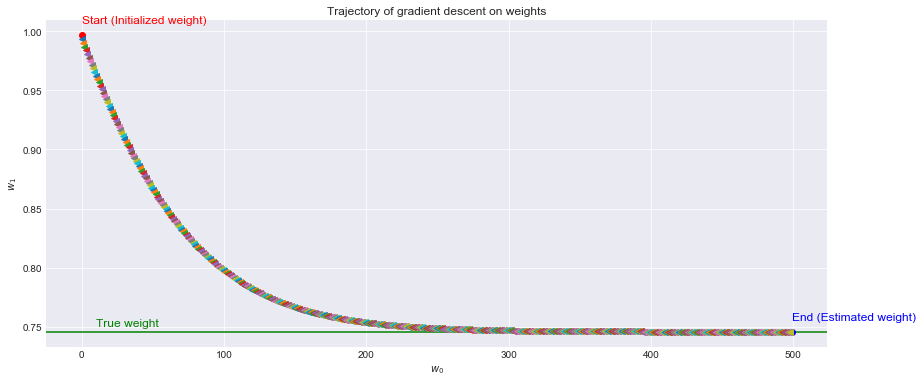

In [10]:
def plot_labeled_point(x, y, label, color):
    plt.plot(x, y, marker="o", color=color)
    plt.text(x, y + 0.01, label, fontsize=12, color=color)

plt.figure(figsize=(14,6))
plt.axhline(w, color="g")
plt.text(10, w + 0.005, "True weight", fontsize=12, color="g")
plot_labeled_point(0, weight_history[0], "Start (Initialized weight)", "r")
plot_labeled_point(iterations-1, weight_history[-1], "End (Estimated weight)", "b")
prev_w = weight_history[0]
for t, w in enumerate(weight_history[1:]):
    plt.plot(t, w, '<-')
    prev_w = w
plt.xlabel(r'$w_0$')
plt.ylabel(r'$w_1$')
plt.title('Trajectory of gradient descent on weights')
plt.show()


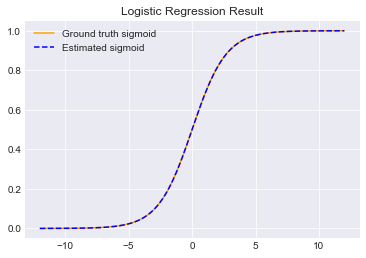

In [11]:
plt.figure()
plt.plot(train_x, sigmoid(train_x, w), color='orange', label='Ground truth sigmoid')
plt.plot(train_x, sigmoid(train_x, w_est.numpy()), 'b--', label='Estimated sigmoid')
plt.legend()
plt.title('Logistic Regression Result')
plt.show()